In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("./BBDD_Hospitalización.xlsx")
df.info()
df.dropna(how='all',inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Se eliminaran las variables que no seran consdieradas para el estudio 

In [41]:
df.drop(columns=['HOSPITALIZACIÓN ULTIMO MES','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA','BIOPSIAS PREVIAS','NUMERO DE MUESTRAS TOMADAS'],inplace=True)

### Voy a analizar la distribucion de valores de las columnas

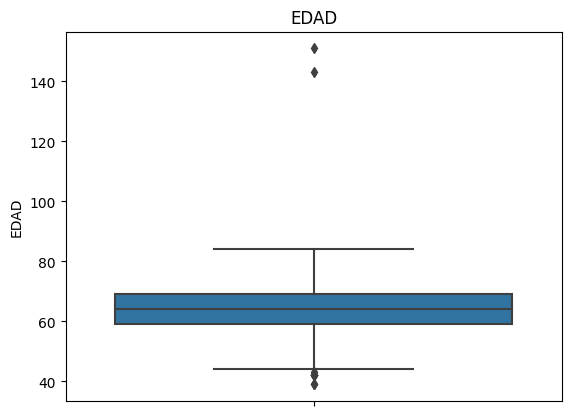

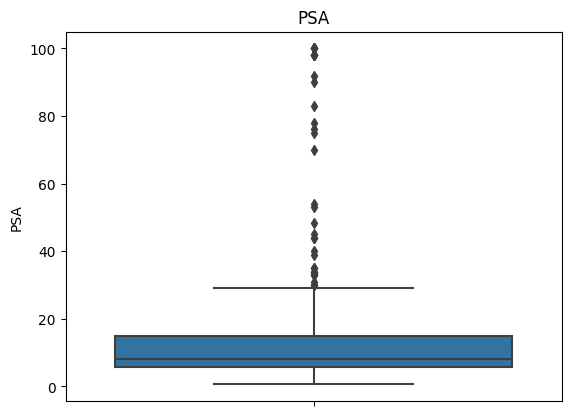

In [42]:
columnas = df.describe().columns

for columna in columnas:
    sns.boxplot(df,y=columna)
    plt.title(columna)
    plt.show()
    

### Se encontraron valores atipicos, pero debido a falta de informacion solo se modificaran los valores de edad mayor a 100 años restandole 100

In [43]:
# Para la columna edad solo se tratarn los outliers mayores a 100 años
# Para las demas no secuentan con suficiente informacion,  y casos como PSA tienen muchos outliers asique se contaran como atipicos normales simplemente

df['EDAD'] = df['EDAD'].where(df['EDAD']<100,df['EDAD']-100)

In [44]:
columnas_cat = df.drop(columns=columnas).columns

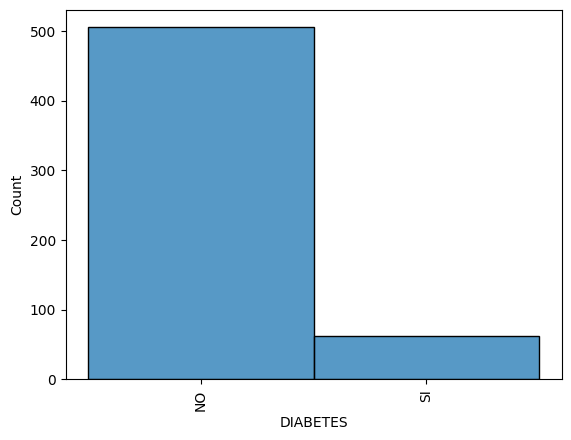

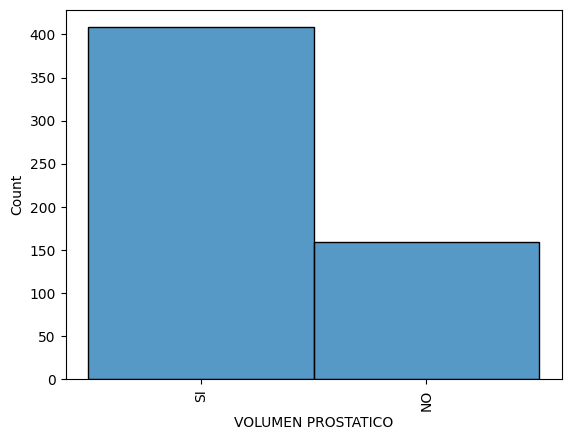

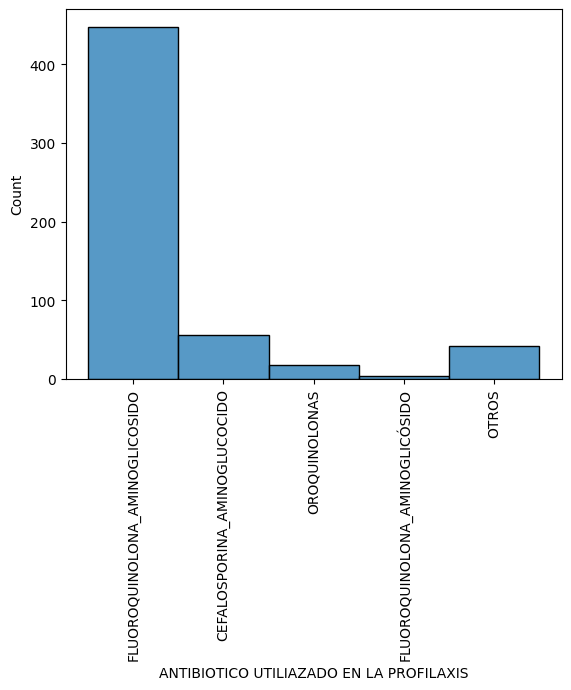

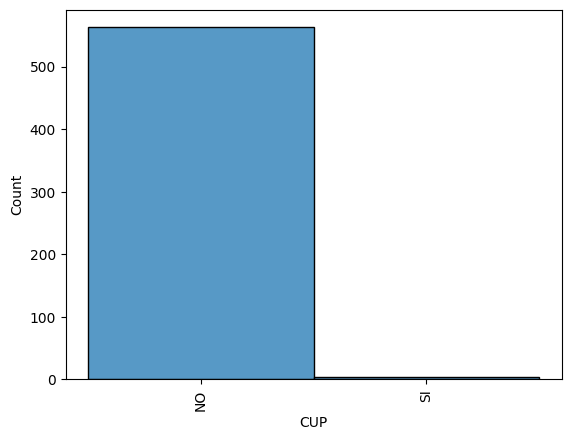

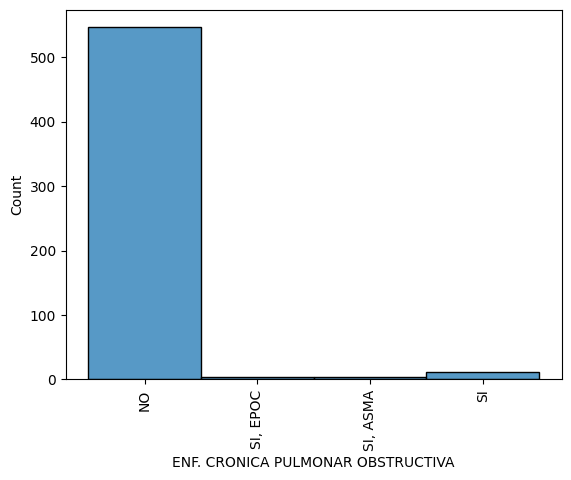

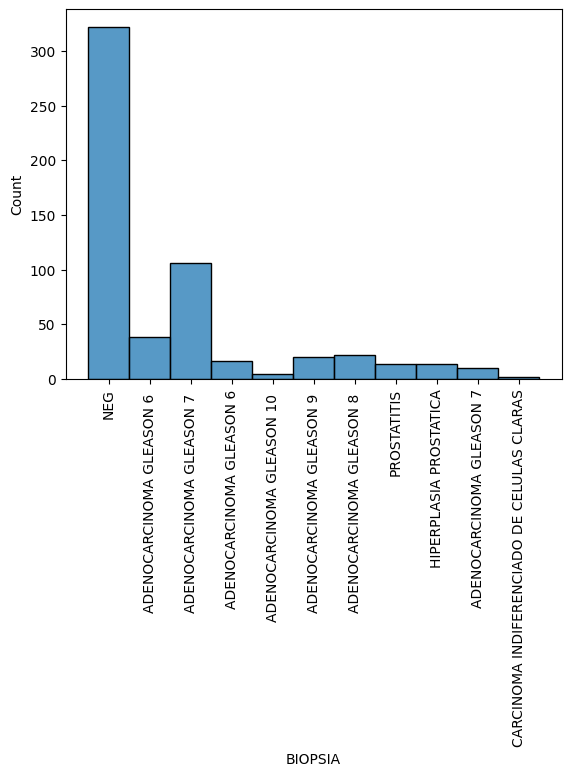

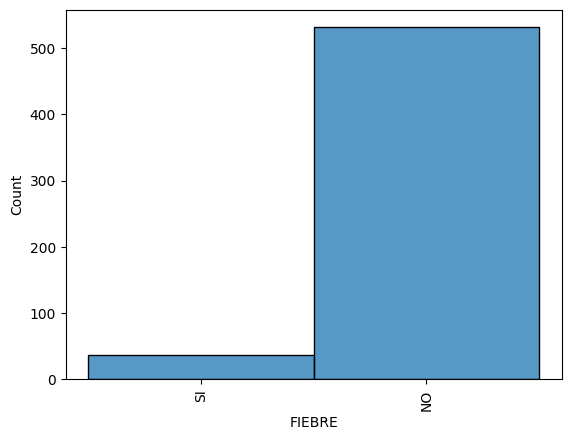

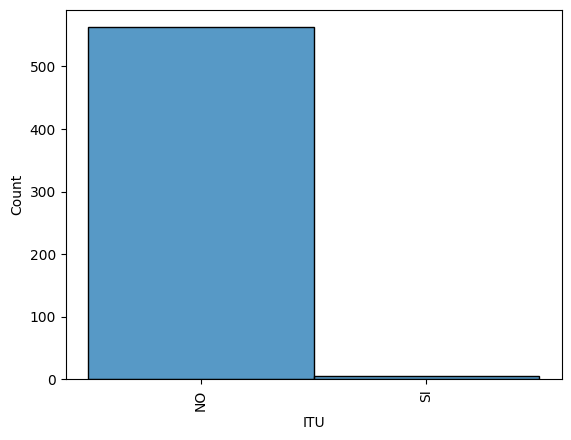

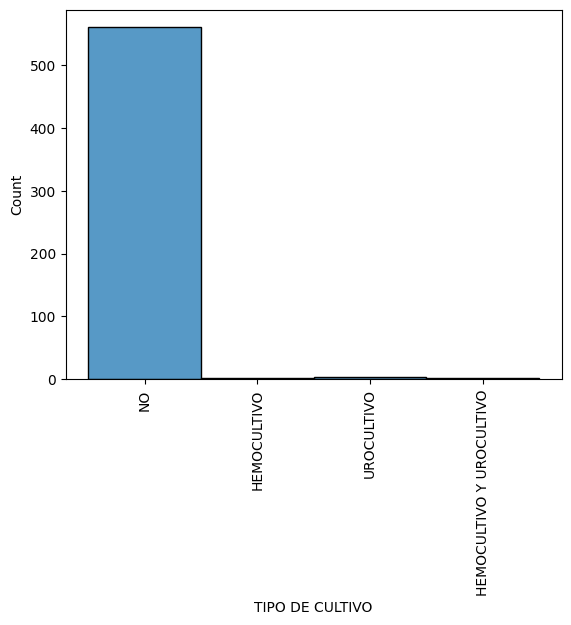

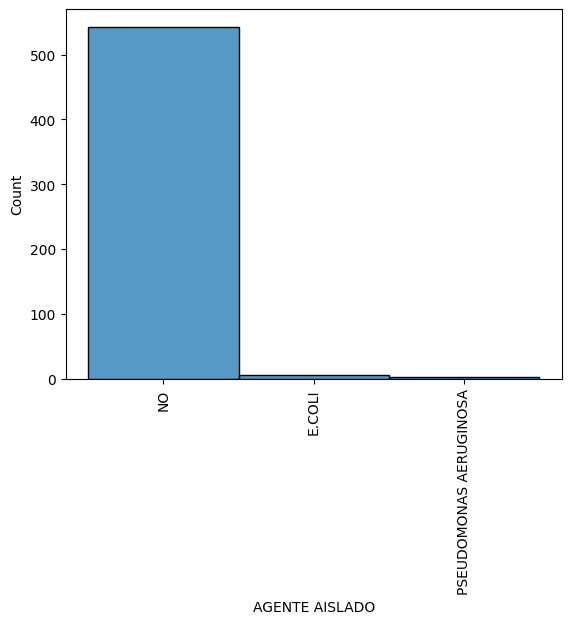

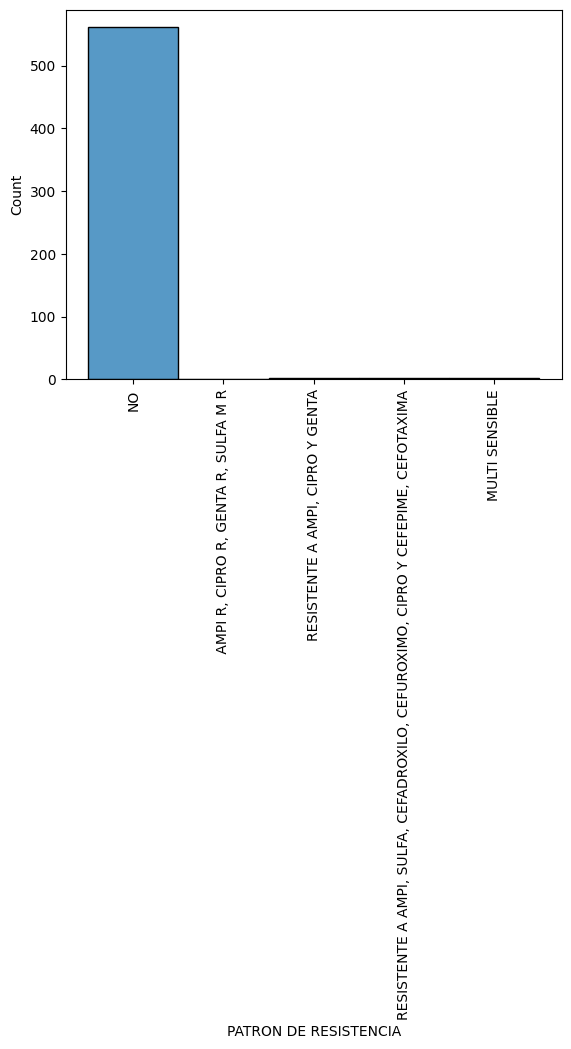

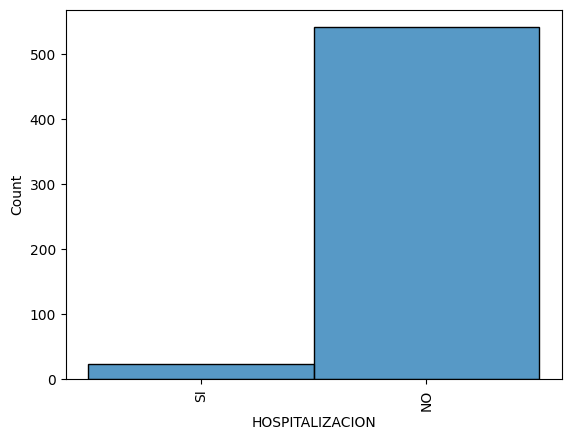

In [45]:

for columna in columnas_cat:
    sns.histplot(data=df,x=columna)
    plt.xticks(rotation=90)
    plt.show()

In [46]:
df[df.isna().any(axis=1)]

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
9,44.0,NO,NaN,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI
26,75.0,NO,25.00,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NaN,NO,NO
31,63.0,NO,10.80,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NaN
76,57.0,NO,NaN,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO
99,70.0,NO,7.20,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NaN,NO,NO
100,74.0,NO,5.80,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NaN
103,60.0,NO,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
106,65.0,NO,5.97,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NaN,NO,NO
109,61.0,NO,7.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NaN
115,56.0,NO,4.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NaN,NO,NO


In [47]:
df.isnull().sum()

EDAD                                        0
DIABETES                                    0
PSA                                         4
VOLUMEN PROSTATICO                          1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS     0
CUP                                         1
ENF. CRONICA PULMONAR OBSTRUCTIVA           2
BIOPSIA                                     0
FIEBRE                                      0
ITU                                         0
TIPO DE CULTIVO                             0
AGENTE AISLADO                             17
PATRON DE RESISTENCIA                       0
HOSPITALIZACION                             3
dtype: int64

#### En la columna numerica PSA son solo 4 nulos, por esto y el hecho de conocer la relevancia de este valor se eliminaran estas filas 
#### En cuanto a las columnas de valores categoricos los nulos se remplazaran por no

In [48]:
df.dropna(subset=['PSA'], inplace=True)
columnas_nulos = ['DIABETES','VOLUMEN PROSTATICO','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','ITU','PATRON DE RESISTENCIA','AGENTE AISLADO','BIOPSIA']
df[columnas_nulos] = df[columnas_nulos].fillna('NO')

### Ahora voy a normalizar los valores de la columnas.

In [49]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace("SI, EPOC",'SI',inplace=True)
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace("SI, ASMA",'SI',inplace=True)
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO','FLUOROQUINOLONA_AMINOGLICOSIDO',inplace=True)
df['PATRON DE RESISTENCIA'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R','AMPI_CIPRO_GENTA_SULFA',inplace=True)
df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, CIPRO Y GENTA','AMPI_CIPRO_GENTA',inplace=True)
df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA','AMPI_CIPRO_SULFA_CEFADROXILO_CEFUROXIMO_CEFEPIME_CEFOTAXIMA',inplace=True)
df['BIOPSIA'] = df['BIOPSIA'].str.strip()
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].apply(lambda  x:'NO' if x=='NO' else 'SI')


### Preparacion, voy a usar la columna hospitalizacion como target

In [50]:
col = 'HOSPITALIZACION' # Otra columna que podria tener en cuenta para los consideraedos casos son los que se hospitalizaron
df.loc[df[col] == 'NO', 'CASO'] = 0
df['CASO'].fillna(1,inplace=True)
df.drop(columns=[col]) # 


,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,CASO
0,53.0,NO,4.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,1.0
1,56.0,NO,7.70,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,1.0
2,57.0,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,SI,1.0
3,56.0,NO,7.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,1.0
4,55.0,NO,29.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,NO,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,6.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,0.0
564,64.0,NO,4.80,SI,OTROS,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,0.0
565,69.0,NO,4.43,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,0.0
566,67.0,NO,8.00,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,0.0


### Ahora voy a proceder a gerearn dummies con las variables categoricas dependientes.

In [51]:
culomnas_dic = ['DIABETES','VOLUMEN PROSTATICO','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','PATRON DE RESISTENCIA']
for columna in culomnas_dic:
    df[columna] = df[columna].map({'SI':1,'NO':0})    

In [52]:
columnas_x = ['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','BIOPSIA','ITU','TIPO DE CULTIVO','AGENTE AISLADO']
columnas_x


['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
 'BIOPSIA',
 'ITU',
 'TIPO DE CULTIVO',
 'AGENTE AISLADO']

In [53]:
df = pd.get_dummies(data=df,columns=columnas_x,dtype=int)

In [54]:
df

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,PATRON DE RESISTENCIA,HOSPITALIZACION,CASO,...,BIOPSIA_PROSTATITIS,ITU_NO,ITU_SI,TIPO DE CULTIVO_HEMOCULTIVO,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA
0,53.0,0,4.00,1,0,0,1,0,SI,1.0,...,0,1,0,0,0,1,0,0,1,0
1,56.0,0,7.70,1,0,0,1,0,SI,1.0,...,0,1,0,0,0,1,0,0,1,0
2,57.0,0,29.00,1,0,0,1,1,SI,1.0,...,0,1,0,1,0,0,0,1,0,0
3,56.0,0,7.00,1,0,0,1,0,SI,1.0,...,0,1,0,0,0,1,0,0,1,0
4,55.0,0,29.00,1,0,0,1,0,SI,1.0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,0,6.00,1,0,0,0,0,NO,0.0,...,0,1,0,0,0,1,0,0,1,0
564,64.0,0,4.80,1,0,0,0,0,NO,0.0,...,0,1,0,0,0,1,0,0,1,0
565,69.0,0,4.43,0,0,0,0,0,NO,0.0,...,0,1,0,0,0,1,0,0,1,0
566,67.0,0,8.00,1,0,0,0,0,NO,0.0,...,0,1,0,0,0,1,0,0,1,0


In [55]:
df.drop(columns='HOSPITALIZACION'
        ,inplace=True)

In [56]:
correlacion = df.corr()
columnas_interesantes = correlacion[(correlacion['CASO'] > 0.4) | ((correlacion['CASO'] < -0.4))]['CASO']
print(columnas_interesantes)

FIEBRE                   0.634370
PATRON DE RESISTENCIA    0.509948
CASO                     1.000000
ITU_NO                  -0.471697
ITU_SI                   0.471697
TIPO DE CULTIVO_NO      -0.545647
AGENTE AISLADO_E.COLI    0.471697
AGENTE AISLADO_NO       -0.545647
Name: CASO, dtype: float64


<Axes: >

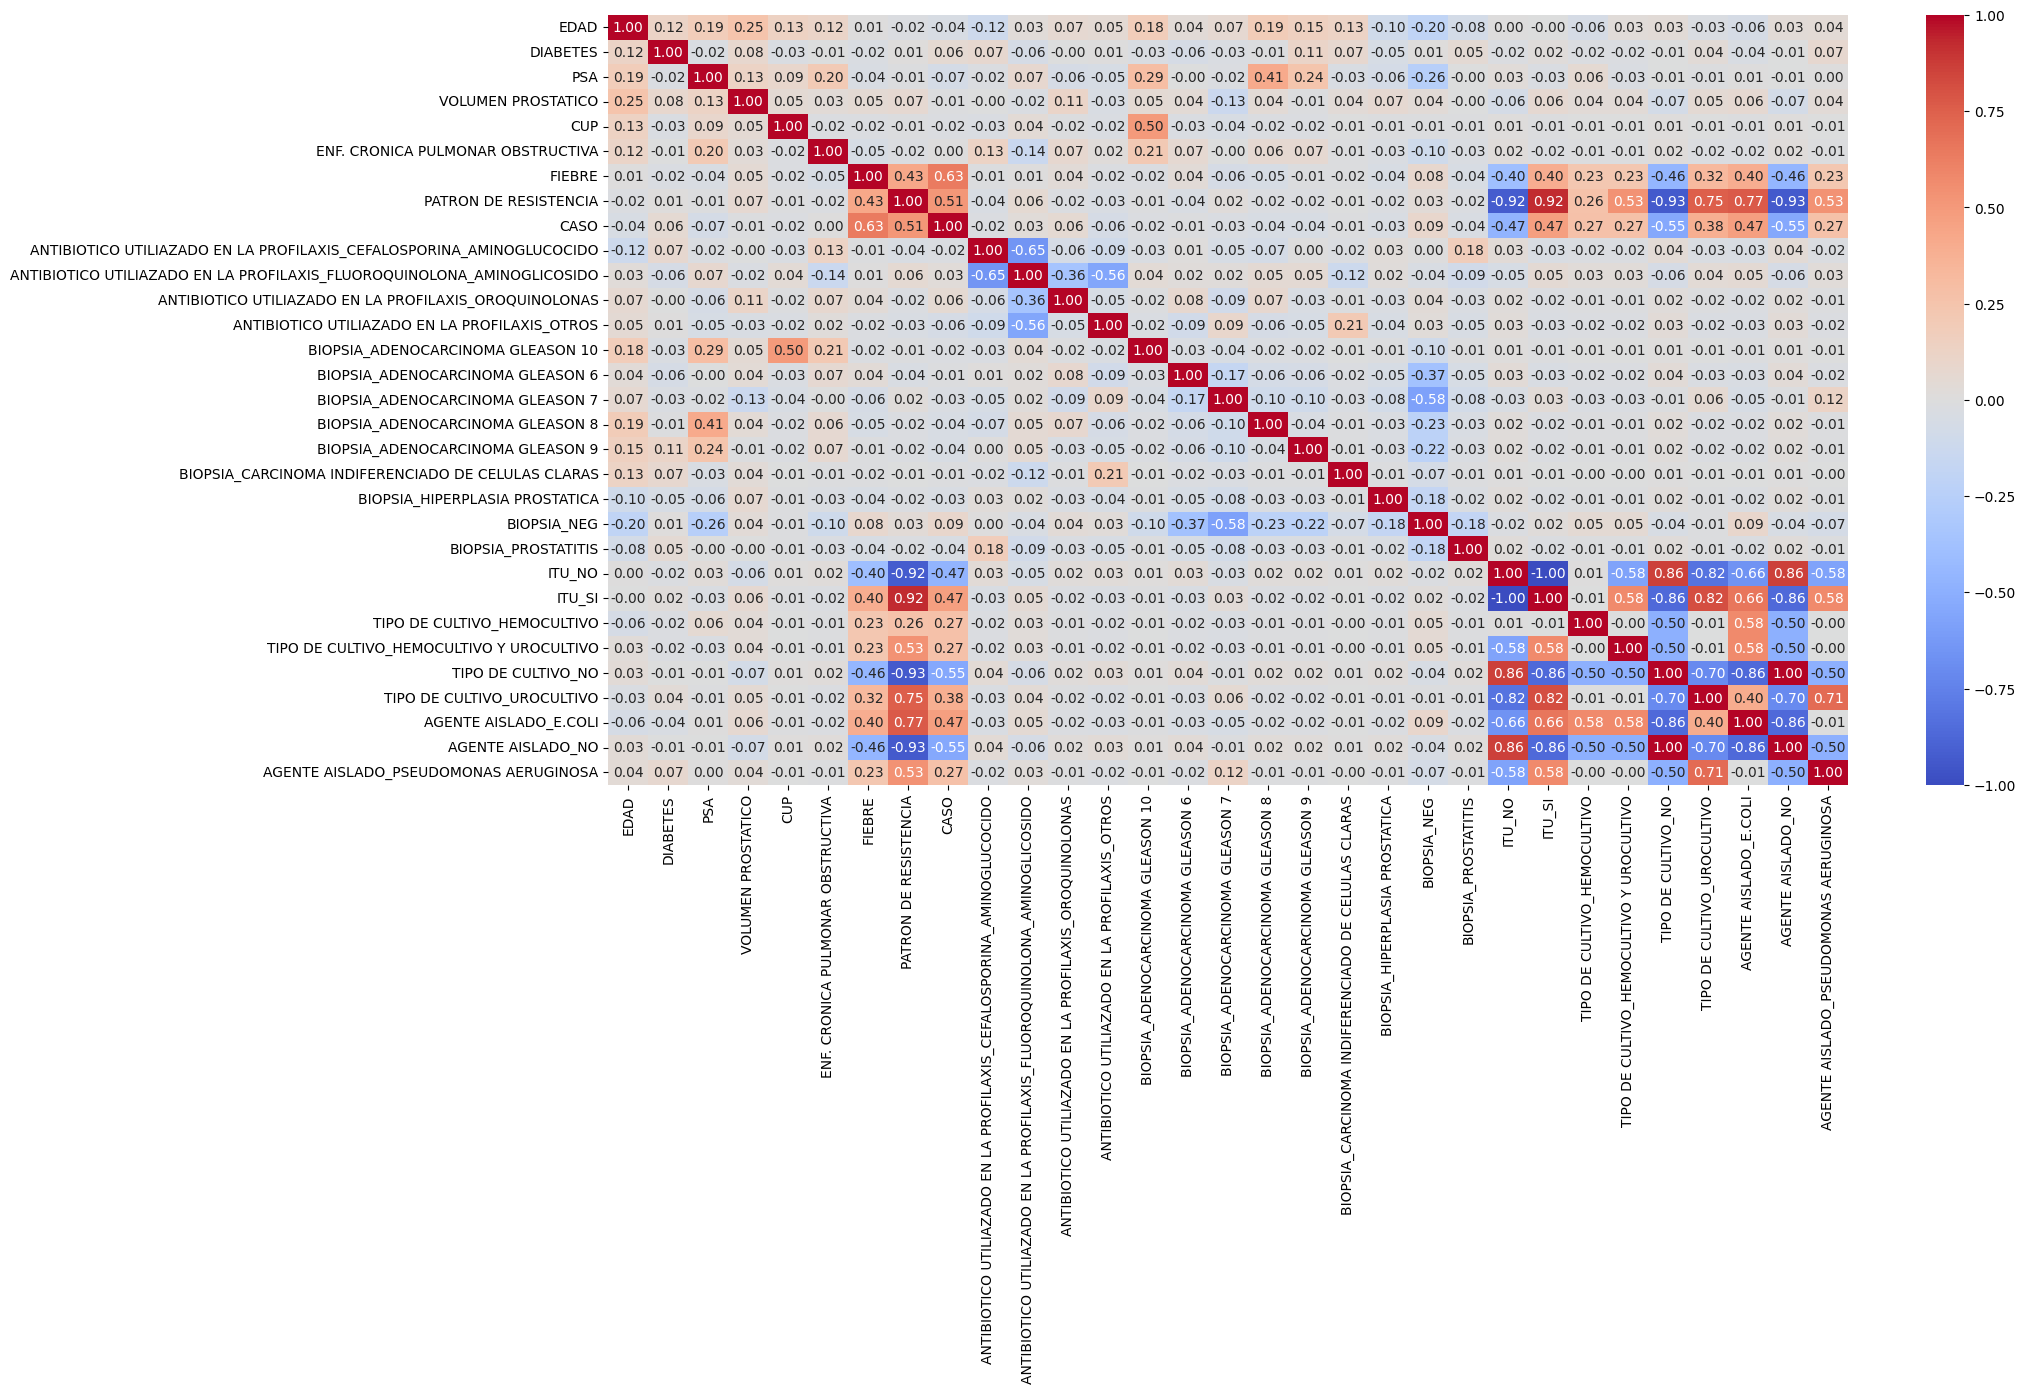

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlacion,annot=True,cmap = 'coolwarm',fmt='.2f')

In [58]:
df.to_csv('df_procesado.csv',index=False)